In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import yfinance as yf
import datetime as dt


## Step 1: Load and prepare the data

In [2]:
# Set the date range from the current date and the previous  3 years.
start_date = dt.datetime.now() - dt.timedelta(days=365)
end_date = dt.datetime.now()

#Define a stock  symbol for use
ticker = 'TSLA'

In [3]:
# Download the data
data = yf.download(ticker, start=start_date, end=end_date)


[*********************100%%**********************]  1 of 1 completed


In [4]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-05-17,168.410004,174.500000,167.190002,173.860001,173.860001,125473600
2023-05-18,174.220001,177.059998,172.449997,176.889999,176.889999,109520300
2023-05-19,177.169998,181.949997,176.309998,180.139999,180.139999,136024200
2023-05-22,180.699997,189.320007,180.110001,188.869995,188.869995,132001400
2023-05-23,186.199997,192.960007,185.259995,185.770004,185.770004,156952100
...,...,...,...,...,...,...
2024-05-09,175.009995,175.619995,171.369995,171.970001,171.970001,65950300
2024-05-10,173.050003,173.059998,167.750000,168.470001,168.470001,72627200
2024-05-13,170.000000,175.399994,169.000000,171.889999,171.889999,67018900


In [39]:
# Calculate the log return
data['Log_Return'] = np.log(data['Adj Close'] / data['Adj Close'].shift(1)) - 1 

# Drop the first row since it will have NaN for log return
data2 = data.dropna()


In [40]:
data2

,Open,High,Low,Close,Adj Close,Volume,Log_Return
Date,,,,,,,
2023-05-18,174.220001,177.059998,172.449997,176.889999,176.889999,109520300,-0.982722
2023-05-19,177.169998,181.949997,176.309998,180.139999,180.139999,136024200,-0.981794
2023-05-22,180.699997,189.320007,180.110001,188.869995,188.869995,132001400,-0.952675
2023-05-23,186.199997,192.960007,185.259995,185.770004,185.770004,156952100,-1.016550
2023-05-24,182.229996,184.220001,178.220001,182.899994,182.899994,137605100,-1.015570
...,...,...,...,...,...,...,...
2024-05-09,175.009995,175.619995,171.369995,171.970001,171.970001,65950300,-1.015865
2024-05-10,173.050003,173.059998,167.750000,168.470001,168.470001,72627200,-1.020562
2024-05-13,170.000000,175.399994,169.000000,171.889999,171.889999,67018900,-0.979903


In [42]:
# Extracting the revalent column 'Log_Return'
columns_to_drop = ['Open', 'High', 'Low', 'Close','Volume', 'Adj Close']
data2 = data2.drop(columns_to_drop, axis=1)


In [43]:
# data2 = data2.reset_index()

data2


,Log_Return
Date,
2023-05-18,-0.982722
2023-05-19,-0.981794
2023-05-22,-0.952675
2023-05-23,-1.016550
2023-05-24,-1.015570
...,...
2024-05-09,-1.015865
2024-05-10,-1.020562
2024-05-13,-0.979903


## Step 2: Visualize the Data

In [34]:
from statsmodels.tsa.stattools import adfuller
from numpy import log


<Axes: xlabel='Date'>

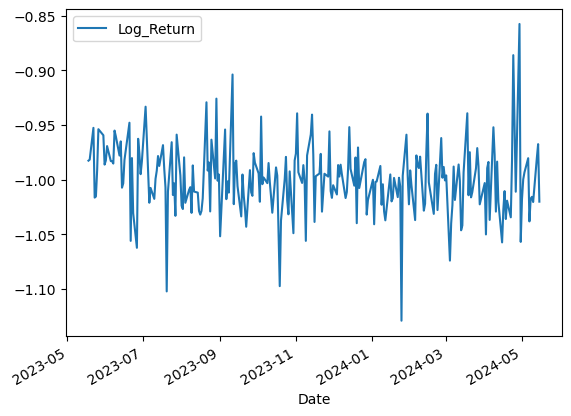

In [44]:
# show the the trend of data
data2.plot()


In [45]:
# Stationarity test on the original Series using Augmented Dickey-Fuller (ADF) test
augdft= adfuller(data2['Log_Return'])


In [46]:
# Display the results of the Augmented Dickey-Fuller (ADF) test
print("ADF Test Results:")
print("Test Statistic:", augdft[0])  # Display the Test Statistic
print("p-value:", augdft[1])  # Display the p-value
print("Number of Lags Used:", augdft[2])  # Display the number of lags used
print("Number of Observations Used:", augdft[3])  # Display the number of observations used
print("Critical Values:")
for key, value in augdft[4].items():  # Display the critical values
    print(f"   {key}: {value}")
print("Maximized Information Criterion (AIC):", augdft[5])  # Display the maximized information criterion (AIC)


ADF Test Results:
Test Statistic: -14.735762383052135
p-value: 2.6170870273496514e-27
Number of Lags Used: 0
Number of Observations Used: 249
Critical Values:
   1%: -3.4568881317725864
   5%: -2.8732185133016057
   10%: -2.5729936189738876
Maximized Information Criterion (AIC): -934.6508693061005


### Note:

- **Test Statistic:** The Test Statistic is significantly negative (-159.14), indicating strong evidence against the null hypothesis of non-stationarity.

- **p-value:** The p-value is very close to zero (3.39688e-27), suggesting that the probability of obtaining such a Test Statistic under the null hypothesis is extremely low. Therefore, we reject the null hypothesis in favor of stationarity.

### Differencing

In [47]:
data2['Log_Return First Diff.'] = data2['Log_Return'] - data2['Log_Return'].shift(1)


In [48]:

data2['Seasonal First Diff.']=data2['Log_Return']-data2['Log_Return'].shift(12)


In [49]:
data2.head(15)

,Log_Return,Log_Return First Diff.,Seasonal First Diff.
Date,,,
2023-05-18,-0.982722,NaN,NaN
2023-05-19,-0.981794,0.000929,NaN
2023-05-22,-0.952675,0.029118,NaN
2023-05-23,-1.016550,-0.063874,NaN
2023-05-24,-1.015570,0.000980,NaN
2023-05-25,-0.991453,0.024117,NaN
2023-05-26,-0.953916,0.037536,NaN
2023-05-30,-0.959470,-0.005554,NaN
2023-05-31,-0.986324,-0.026854,NaN


<Axes: xlabel='Date'>

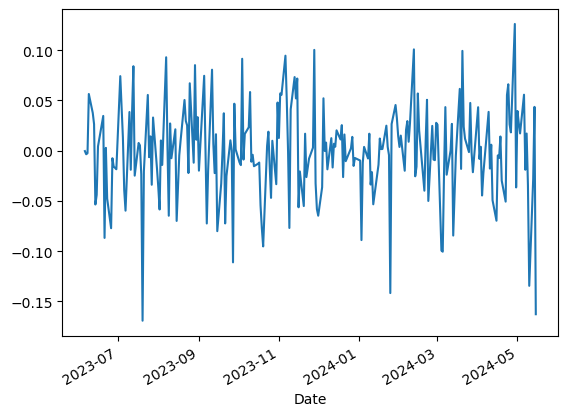

In [50]:
data2['Seasonal First Diff.'].plot()


In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


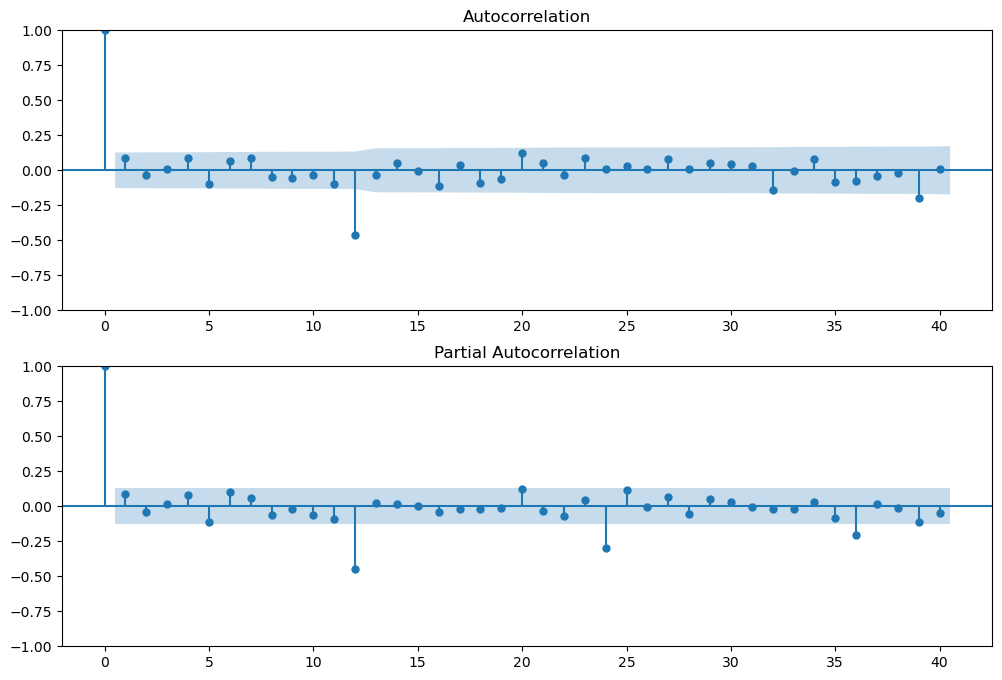

In [51]:
fig = plt.figure(figsize=(12, 8))
ax1 = fig.add_subplot(211)
fig = plot_acf(data2['Seasonal First Diff.'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = plot_pacf(data2['Seasonal First Diff.'].iloc[13:], lags=40, ax=ax2)


## Step 3: The Model

In [21]:

from statsmodels.tsa.arima.model import ARIMA


In [54]:
#p=1, d=1, q=0 or 1

model=ARIMA(data2['Log_Return'],order=(0,1,0))
model_fit=model.fit()


C:\Users\joshu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\joshu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\joshu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [23]:
model_fit.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:             Log_Return   No. Observations:                  250
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 468.331
Date:                Thu, 16 May 2024   AIC                           -930.662
Time:                        08:43:59   BIC                           -920.109
Sample:                             0   HQIC                          -926.414
                                - 250                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6056      0.048    -12.595      0.000      -0.700      -0.511
ar.L2         -0.3380      0.060     -5.623      0.000      -0.456      -0.220
sigma2         0.0014   9.69e-05     14.016      0.000       0.001       0.002
===================================================================================
Ljung-Box (L1) (Q):                   2.27   Jarque-Bera (JB):                14.52
Prob(Q):                              0.13   Prob(JB):                         0.00
Heteroskedasticity (H):               1.21   Skew:                             0.02
Prob(H) (two-sided):                  0.39   Kurtosis:                         4.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [161]:
data2

,Log_Return,Log_Return First Diff.,Seasonal First Diff.,forecast
Date,,,,
2023-05-16,-0.998979,NaN,NaN,0.000000
2023-05-17,-0.956865,0.042114,NaN,-0.998979
2023-05-18,-0.982722,-0.025857,NaN,-0.956865
2023-05-19,-0.981794,0.000929,NaN,-0.982722
2023-05-22,-0.952675,0.029118,NaN,-0.981794
...,...,...,...,...
2024-05-08,-1.017531,0.020811,0.017063,-1.038342
2024-05-09,-1.015865,0.001666,-0.034210,-1.017531
2024-05-10,-1.020562,-0.004698,-0.134437,-1.015865


In [55]:
#p=0, d=1, q=0 
model = ARIMA(data2['Log_Return'], order=(0, 1, 0))
model_fit = model.fit()


C:\Users\joshu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\joshu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\joshu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<Axes: xlabel='Date'>

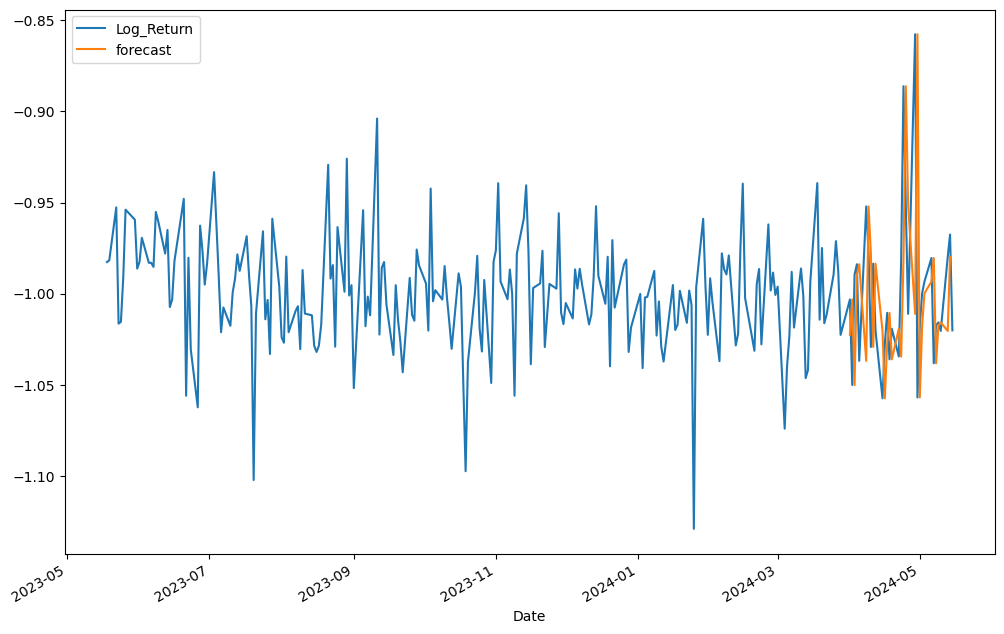

In [56]:

forecast = model_fit.predict(start='2024-04-01', end='2024-05-14', dynamic=False)
data2['forecast'] = forecast

data2[['Log_Return', 'forecast']].plot(figsize=(12, 8))


## STEP 4: Make Predictions

In [57]:
from pandas.tseries.offsets import DateOffset

data3 = data2.copy()
data3 = data3.reset_index()
data3


,Date,Log_Return,Log_Return First Diff.,Seasonal First Diff.,forecast
0,2023-05-18,-0.982722,NaN,NaN,NaN
1,2023-05-19,-0.981794,0.000929,NaN,NaN
2,2023-05-22,-0.952675,0.029118,NaN,NaN
3,2023-05-23,-1.016550,-0.063874,NaN,NaN
4,2023-05-24,-1.015570,0.000980,NaN,NaN
...,...,...,...,...,...
245,2024-05-09,-1.015865,0.001666,-0.034210,-1.017531
246,2024-05-10,-1.020562,-0.004698,-0.134437,-1.015865
247,2024-05-13,-0.979903,0.040659,-0.028361,-1.020562
248,2024-05-14,-0.967602,0.012301,0.043566,-0.979903


In [67]:
# Define the number of future periods to forecast
n_periods = 30 

# Make future predictions
forecast_values = model_fit.forecast(steps=n_periods)

forecast_values


C:\Users\joshu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\joshu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


250   -1.020254
251   -1.020254
252   -1.020254
253   -1.020254
254   -1.020254
255   -1.020254
256   -1.020254
257   -1.020254
258   -1.020254
259   -1.020254
260   -1.020254
261   -1.020254
262   -1.020254
263   -1.020254
264   -1.020254
265   -1.020254
266   -1.020254
267   -1.020254
268   -1.020254
269   -1.020254
270   -1.020254
271   -1.020254
272   -1.020254
273   -1.020254
274   -1.020254
275   -1.020254
276   -1.020254
277   -1.020254
278   -1.020254
279   -1.020254
Name: predicted_mean, dtype: float64

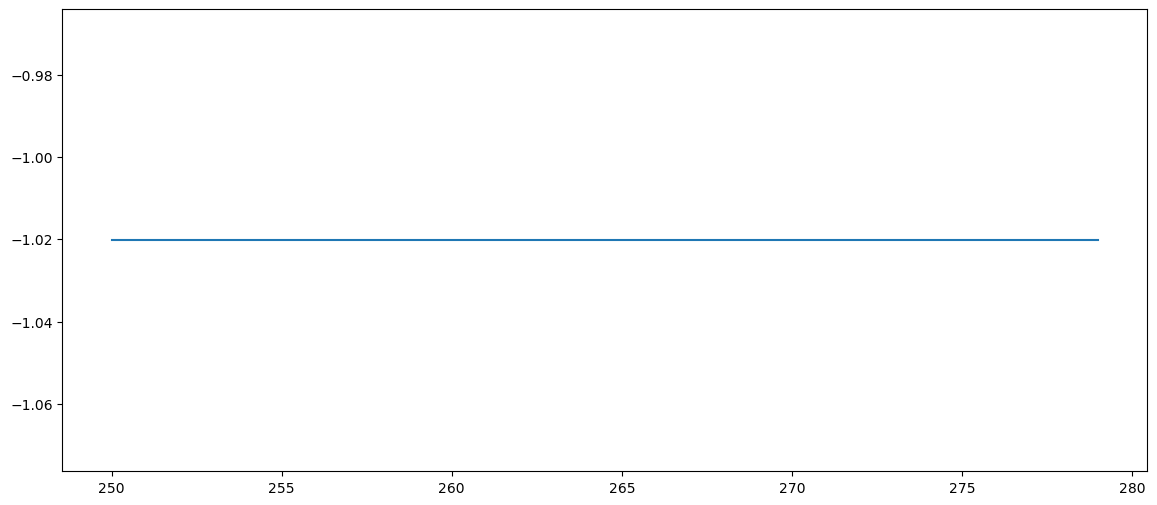

In [65]:
plt.figure(figsize=(14,6))
plt.plot(forecast_values, label='forecast')
plt.show()

In [243]:
# Define the number of future periods to forecast
n_periods = 30 

# Create future dates for the forecast
last_date = data2.index[-1]
print(last_date)
future_dates = pd.date_range(start=last_date, periods=31, freq=data2.index.freq)[1:]
future_dates

2024-05-14 00:00:00


DatetimeIndex(['2024-05-15', '2024-05-16', '2024-05-17', '2024-05-18',
               '2024-05-19', '2024-05-20', '2024-05-21', '2024-05-22',
               '2024-05-23', '2024-05-24', '2024-05-25', '2024-05-26',
               '2024-05-27', '2024-05-28', '2024-05-29', '2024-05-30',
               '2024-05-31', '2024-06-01', '2024-06-02', '2024-06-03',
               '2024-06-04', '2024-06-05', '2024-06-06', '2024-06-07',
               '2024-06-08', '2024-06-09', '2024-06-10', '2024-06-11',
               '2024-06-12', '2024-06-13'],
              dtype='datetime64[ns]', freq='D')

In [257]:
data2 = pd.concat([data2, pd.DataFrame(index=future_dates[0:])])
print(data2.index)

DatetimeIndex(['2023-05-17', '2023-05-18', '2023-05-19', '2023-05-22',
               '2023-05-23', '2023-05-24', '2023-05-25', '2023-05-26',
               '2023-05-30', '2023-05-31',
               ...
               '2024-06-04', '2024-06-05', '2024-06-06', '2024-06-07',
               '2024-06-08', '2024-06-09', '2024-06-10', '2024-06-11',
               '2024-06-12', '2024-06-13'],
              dtype='datetime64[ns]', length=280, freq=None)


In [260]:
# Define the number of future periods to forecast
n_periods = 30

# Make future predictions
forecast_future = model_fit.forecast(steps=n_periods, dynamic =False)
data2['forecast_future2'] = forecast_future
data2[['Log_Return', 'forecast_future']].plot(figsize=(12, 8))
# Plot the actual data and forecast
plt.figure(figsize=(12, 8))  # Set the figure size
plt.plot(data2['Log_Return'], label='Actual Log Return')
plt.plot(data2.index[-n_periods:], data2['forecast_future2'], label='Forecasted Log Return')  # Plot only forecast for clarity

# Add labels and title
plt.xlabel('Time')
plt.ylabel('Log Return')
plt.title('Log Return vs. Forecasted Log Return')

# Add legend
plt.legend()

# Show the plot
plt.grid(True)  # Add a grid for better readability
plt.show()

C:\Users\joshu\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


In [265]:
# Create a DataFrame with forecasted values and future dates
future_df = pd.DataFrame(forecast_future, index=future_dates[0:], columns=['Forecast'])

# Concatenate the DataFrame with future dates to the original DataFrame
merged_df = pd.concat([data2, future_df], axis=1)

In [271]:
data2

,Log_Return,forecast_future2
2023-05-17,-0.956865,NaN
2023-05-18,-0.982722,NaN
2023-05-19,-0.981794,NaN
2023-05-22,-0.952675,NaN
2023-05-23,-1.016550,NaN
...,...,...
2024-06-09,NaN,NaN
2024-06-10,NaN,NaN
2024-06-11,NaN,NaN
2024-06-12,NaN,NaN
